# PyTorch Neural Network Digits Classifier
**Dataset:** MNIST

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import matplotlib.pyplot as plt
from torchvision import datasets, transforms

from torch import nn
from torch import optim
import torch.nn.functional as F

**Download _MNIST_ dataset**  
I will be using batches of 64

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])
# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [4]:
def print_sample_digit(index):
    print(str.format('Label: {}',labels[index]))
    plt.figure(num=None, figsize=(1, 1), dpi=56, facecolor='w', edgecolor='k')
    plt.imshow(images[index].numpy().squeeze(), cmap='Greys_r');

Label: 9


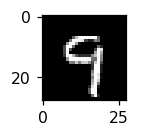

In [8]:
print_sample_digit(0)

Label: 0


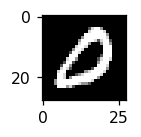

In [9]:
print_sample_digit(1)

### Define the Neural Network class

In [7]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Layers of the Neural Network:
        
        